In [9]:
import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

import warnings
warnings.filterwarnings("ignore")

import Plib.DataFarm.FRData as fr
import Plib.DataFarm.Kibot as kb
import Plib.Plotting.Timing as pt
import Plib.Portfolio.Indexes as pi
import Plib.Stats.PCA as pcl
import Plib.Signals.TAnalysis as signalsfarm
import Plib.Utils.Tools as tls
import Plib.Backtester.VectScreener as scr

import numpy as np 
import pandas as pd 
import datetime
import pickle

import shutup; shutup.please();dwnld=eval(os.environ['RMT_DWNLD'])

## Timing Reports 

In [10]:
mweeks=52
nweeks=26 #rolling window
dt_end=str(datetime.date.today()+ pd.DateOffset(days=-1))[0:10]    #'2022-08-23'
dt_start = str(datetime.datetime.strptime(dt_end,"%Y-%m-%d") + datetime.timedelta(weeks = -(41+mweeks)))[:10]
#dwnld=False
provider='kibot'
provider_idx='frdata'

#tickers=list(fr.getTickers('stock').Tickers.values)
tickers=kb.getTickers('stock')
if dwnld:
    result=pt.getHistComp(tickers, dt_start,dt_end,provider='kibot')
    pd.to_pickle(result,'res.pkl')
    report1,universe=pt.prepareMarketTiming(result, dt_start, dt_end, mweeks=52, nweeks=26, 
                                   avgw=10, w_ema=40, w_ema1=20, w_ema2=65, w_ema3=130, avgwi=4)
    pd.to_pickle(report1,'idx1.pkl')
    pd.to_pickle(universe,'idx1u.pkl')
    report2=pt.getIndexes(result,dt_start,dt_end,universe,mweeks,provider=provider_idx,mc_index=0,last_reporting='')
    pd.to_pickle(report2,'idx2.pkl')
else:
    result = pd.read_pickle("res.pkl")
    result = pt.getHistUpdates(result)
    pd.to_pickle(result,'res.pkl')
    report1 = pd.read_pickle("idx1.pkl")
    universe = pd.read_pickle("idx1u.pkl")
    report2 = pd.read_pickle("idx2.pkl")
pt.printReportTiming(report1, mweeks,nweeks,'Universe('+str(len(universe))+') Constituents at '+datetime.date.today().strftime("%B-%Y"))
pt.printReportIndices(report2, mweeks,'Universe('+str(len(universe))+') Constituents at '+datetime.date.today().strftime("%B-%Y"))


# Sectors 

In [11]:
mweeks=52
nweeks=26 #rolling window
dt_end=str(datetime.date.today()+ pd.DateOffset(days=-1))[0:10]    #'2022-08-23'
dt_start = str(datetime.datetime.strptime(dt_end,"%Y-%m-%d") + datetime.timedelta(weeks = -(41+mweeks)))[:10]
if dwnld:
    if provider=='kibot': data=pd.read_pickle("res.pkl")
    sectrend,universe_s = pt.getSectorsHistComp(dt_start, dt_end,mweeks=mweeks, labl='Close',provider=provider, data=data)
    pd.to_pickle(sectrend.data,'sec1.pkl')
    pd.to_pickle(universe_s,'sec1u.pkl')
sectrend=pt.reportStyler(pd.read_pickle("sec1.pkl"))
universe_s=pd.read_pickle("sec1u.pkl")
pt.printReportTrending(sectrend,'Market(Universe='+str(len(universe_s))+') Trending Analysis at '+datetime.date.today().strftime("%B-%Y, %d"))
sectrend


## Principal Component Analysis

Asset prices shape (79, 6752)


A     AA   AAC  AACG   AADI  AAIC   AAIN    AAL   AAMC  AAME    AAN  AAOI
Date                                                                                                     
2022-05-19 01:00:00-04:00  122.42  62.00  9.79  1.04  14.35  3.39  24.20  16.74  10.00  2.79  19.06  2.48
2022-05-20 01:00:00-04:00  125.18  60.62  9.79  1.01  14.80  3.38  24.00  16.26  10.35  2.86  18.17  2.29
2022-05-23 01:00:00-04:00  126.05  63.15  9.79  1.01  14.79  3.48  23.99  16.75  10.36  2.71  18.00  2.25
2022-05-24 01:00:00-04:00  124.57  61.24  9.80  0.99  13.96  3.45  23.99  15.51  10.11  2.65  17.65  2.17
2022-05-25 01:00:00-04:00  120.38  60.91  9.80  0.97  13.74  3.44  24.00  16.13  10.03  2.76  18.51  2.19

ZVO  ZWRK     ZWRKU  ZWRKW   ZWS    ZY  ZYME  ZYNE  ZYXI   SPY
Date                                                                                      
2022-09-06 01:00:00-04:00 -1.13  0.26 -4.21e-04   0.17 -0.21 -0.40 -5.04 -0.24  0.03 -0.32
2022-09-07 01:00:00-04:00 -0.56  0.26 -4.21e-04   0.04  0.82  1.14 -0.40  0.45  0.78  1.18
2022-09-08 01:00:00-04:00 -0.19  0.26 -4.21e-04   0.04  0.42  0.98  1.58  0.61  0.24  0.40
2022-09-09 01:00:00-04:00  1.16  0.26 -4.21e-04   0.04  0.73  0.26  0.52 -0.07  0.17  1.01
2022-09-12 01:00:00-04:00 -0.46 -1.59 -4.21e-04   0.04  0.59  0.92 -0.86 -0.39 -0.36  0.70

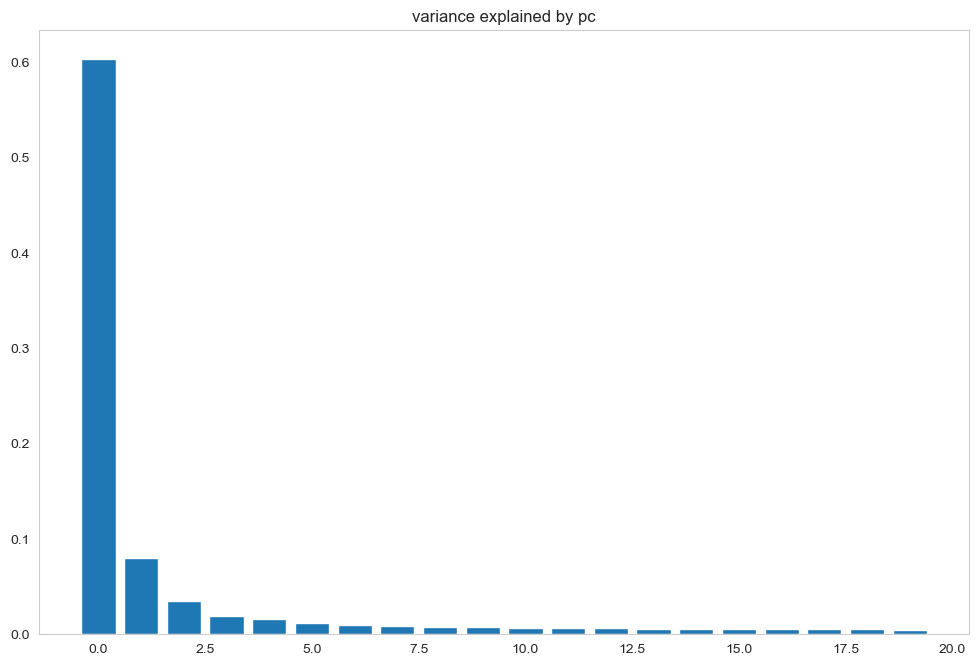

/Users/rob/.local/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1434: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.tick_pos = ax.convert_xuni

Train dataset: (53, 6545)
Test dataset: (25, 6545)
11 components explain 80.00% of variance


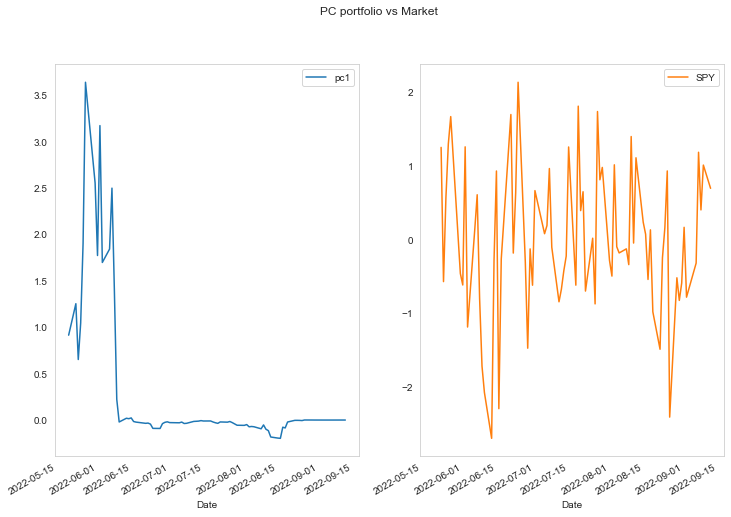

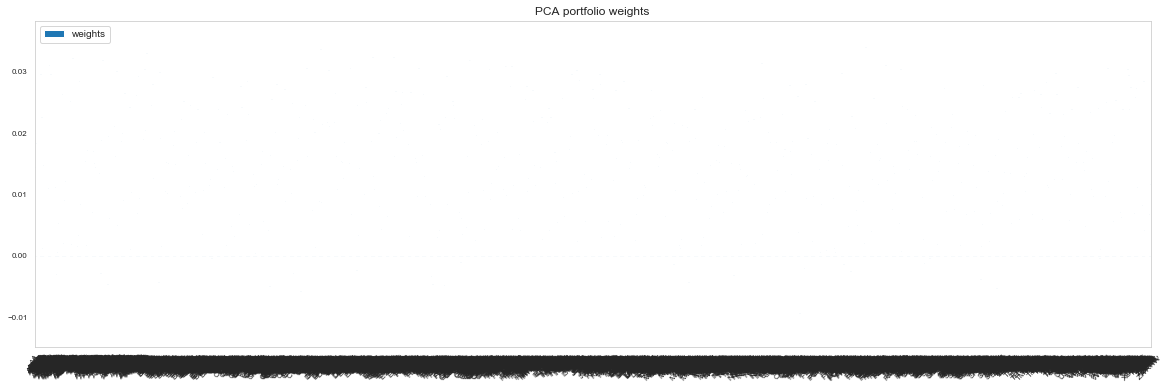

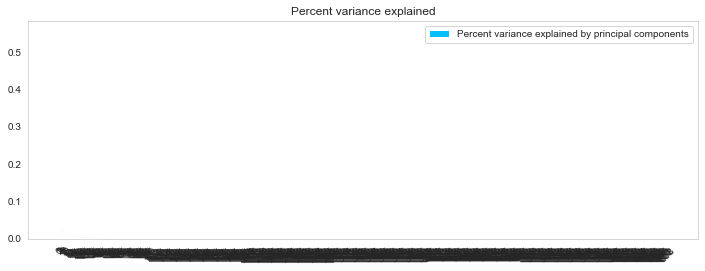

In [6]:
provider='kibot'
index_ticker='SPY'#'SPX'
assets='stock'
data=pd.read_pickle("res.pkl")
asset_prices,asset_returns,normed_returns,dt_train=pcl.preparePCA(index_ticker,assets=assets,provider=provider,data=data, download=False)
#asset_prices,asset_returns,normed_returns,dt_train=pcl.preparePCA(index_ticker,assets=assets,provider='frdata',download=dwnld)
pca,df_raw_test,df_test,num_comp=pcl.computePCA(index_ticker,normed_returns,asset_prices,asset_returns,dt_train,n_comp=20,var_thres=0.8)


Sum of weights of eigen-portfolio N.1: 100.00
Eigen-portfolio N.1:
Return = -100.00%
Volatility = 370.75%
Sharpe = -0.27
Sum of weights of eigen-portfolio N.2: 100.00
Eigen-portfolio N.2:
Return = -97.23%
Volatility = 97.27%
Sharpe = -1.00
Sum of weights of eigen-portfolio N.3: 100.00
Eigen-portfolio N.3:
Return = -100.00%
Volatility = 397.83%
Sharpe = -0.25
Sum of weights of eigen-portfolio N.4: 100.00


/Users/rob/Desktop/PythonCode/Plib/Stats/PCA.py:322: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns),(1 / n_years)) - 1


Eigen-portfolio N.4:
Return = nan%
Volatility = 14852.49%
Sharpe = nan
Sum of weights of eigen-portfolio N.5: 100.00
Eigen-portfolio N.5:
Return = nan%
Volatility = 791.11%
Sharpe = nan
Sum of weights of eigen-portfolio N.6: 100.00
Eigen-portfolio N.6:
Return = 2247.44%
Volatility = 249.94%
Sharpe = 8.99
Sum of weights of eigen-portfolio N.7: 100.00
Eigen-portfolio N.7:
Return = 56159869047117012285784064.00%
Volatility = 3185.22%
Sharpe = 17631415084554540548096.00
Sum of weights of eigen-portfolio N.8: 100.00
Eigen-portfolio N.8:
Return = 2178.56%
Volatility = 404.68%
Sharpe = 5.38
Sum of weights of eigen-portfolio N.9: 100.00
Eigen-portfolio N.9:
Return = nan%
Volatility = 1340.63%
Sharpe = nan
Sum of weights of eigen-portfolio N.10: 100.00
Eigen-portfolio N.10:
Return = nan%
Volatility = 396.19%
Sharpe = nan
Sum of weights of eigen-portfolio N.11: 100.00


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Eigen-portfolio N.11:
Return = nan%
Volatility = 1042.47%
Sharpe = nan


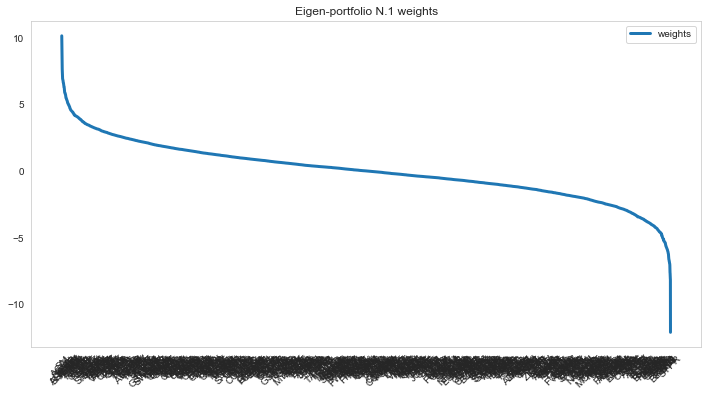

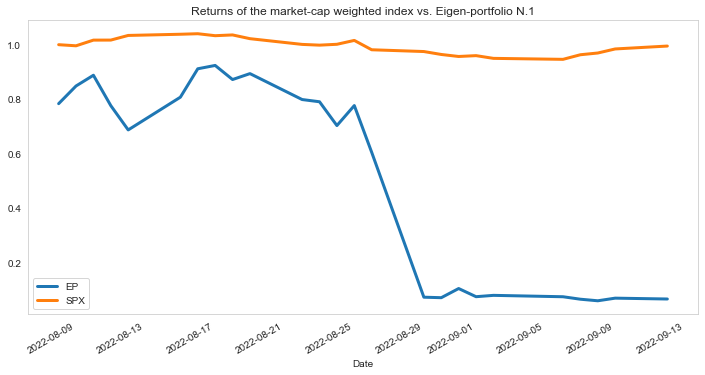

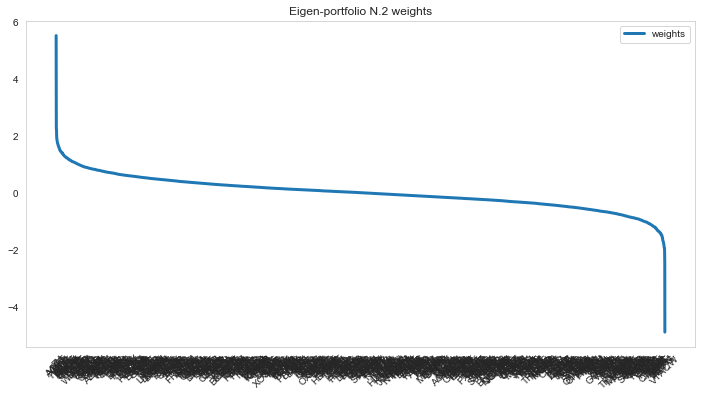

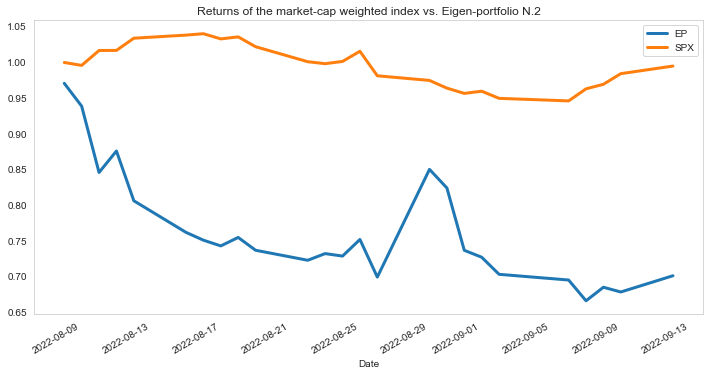

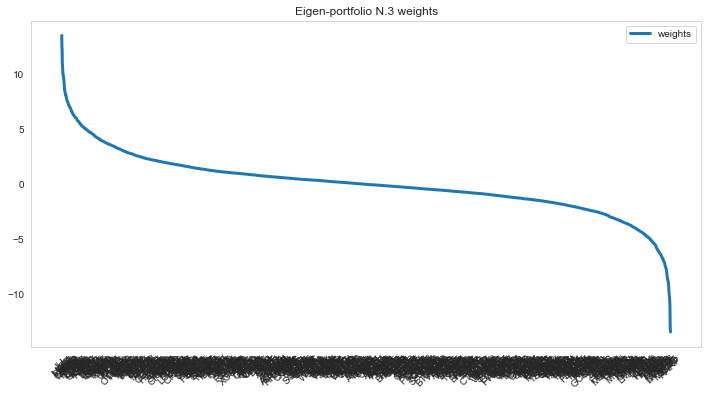

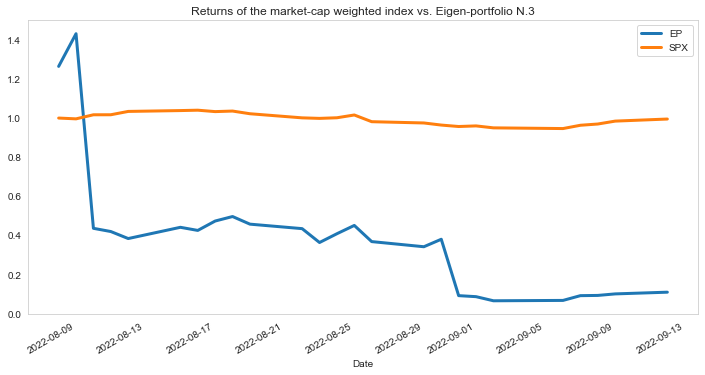

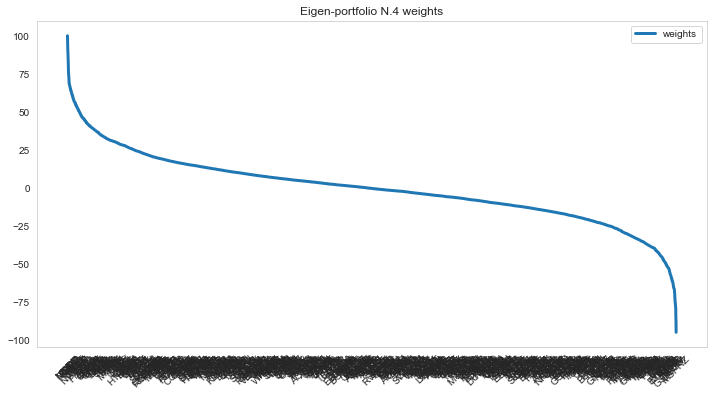

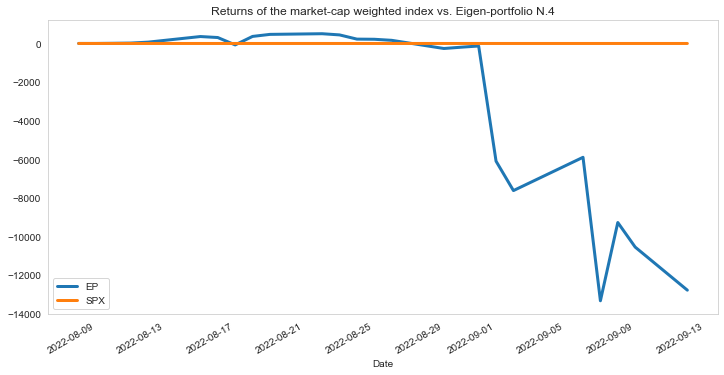

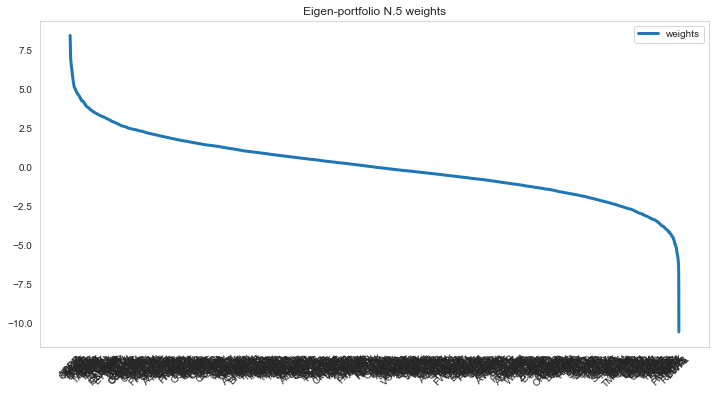

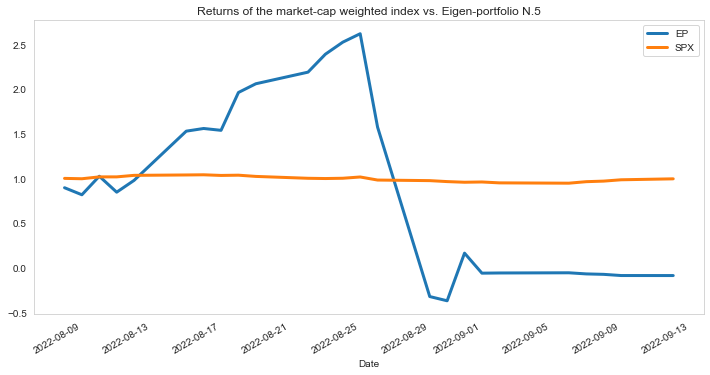

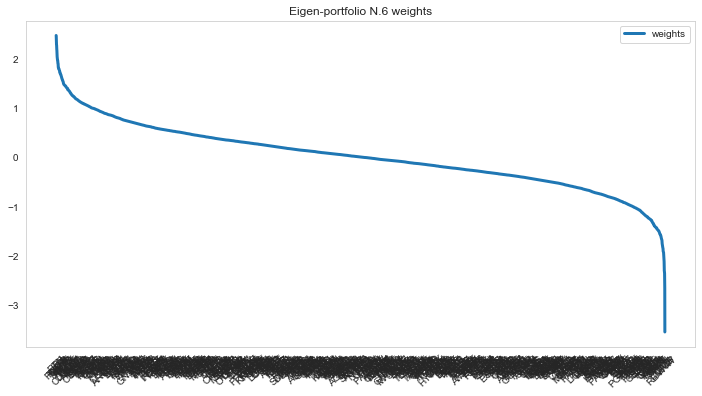

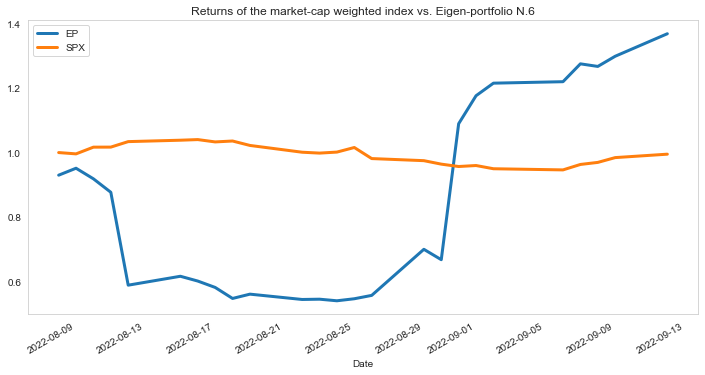

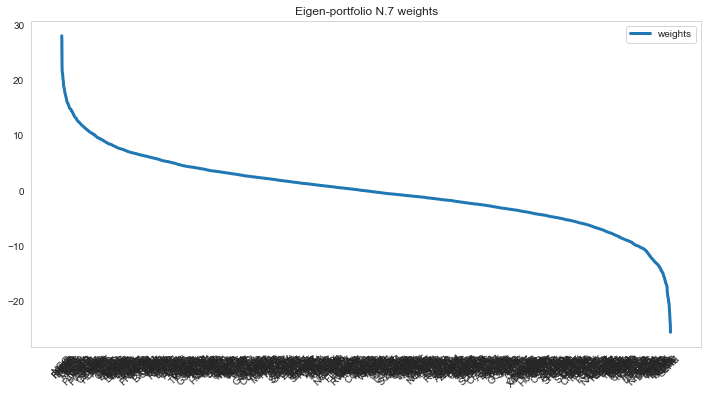

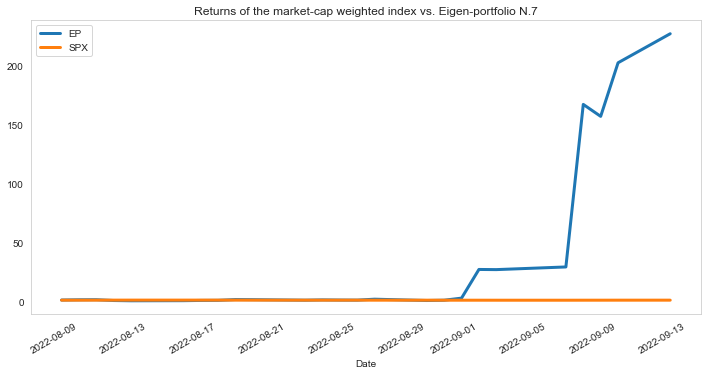

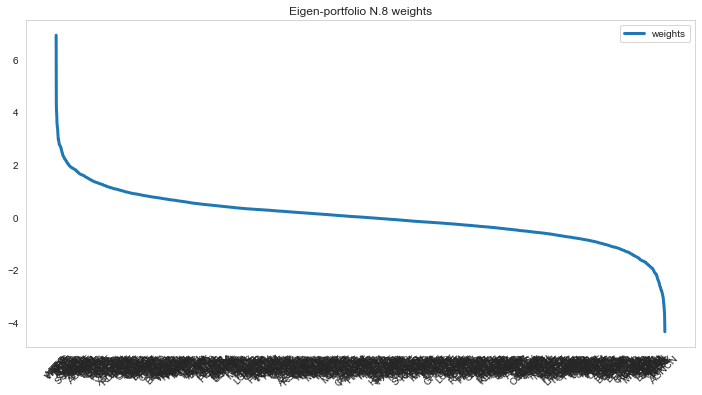

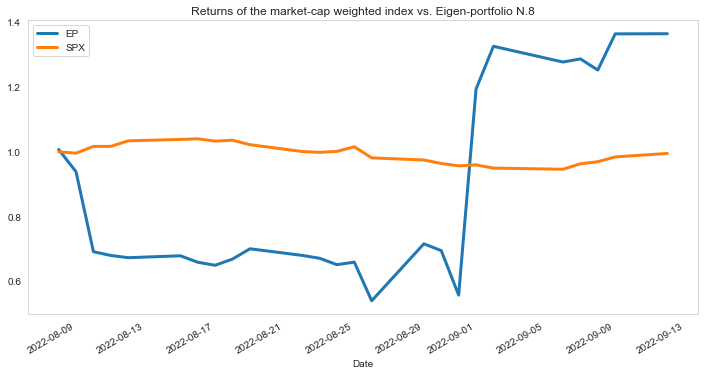

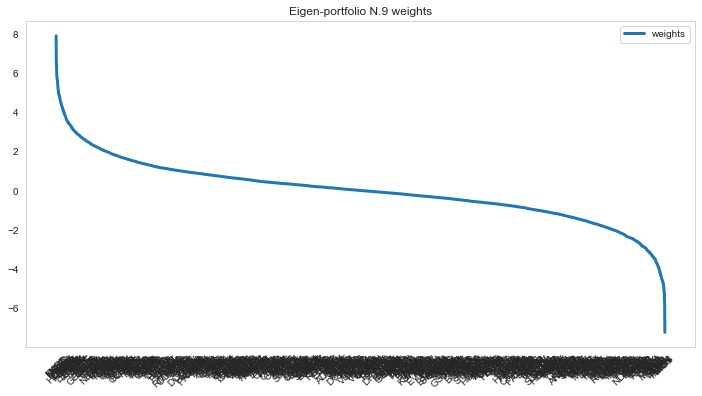

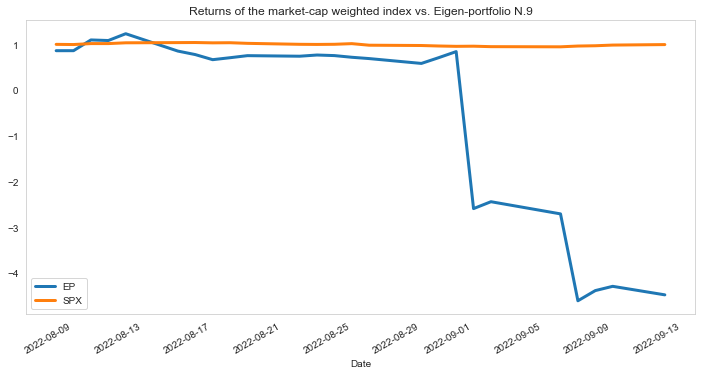

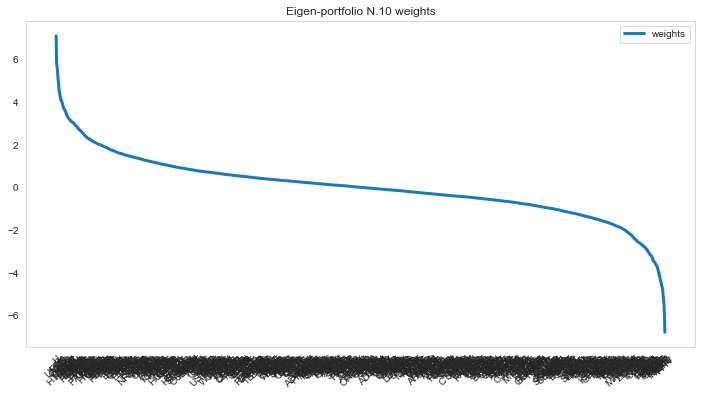

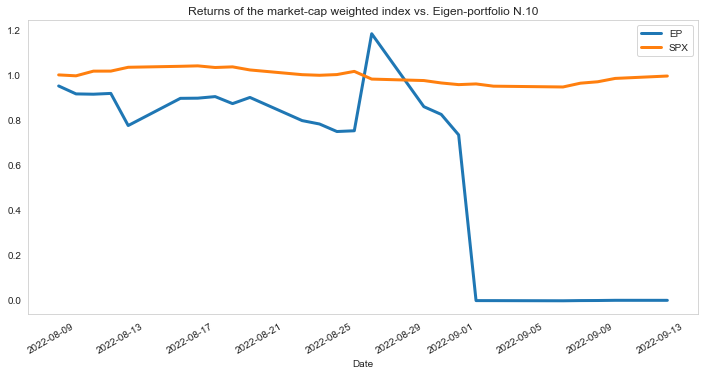

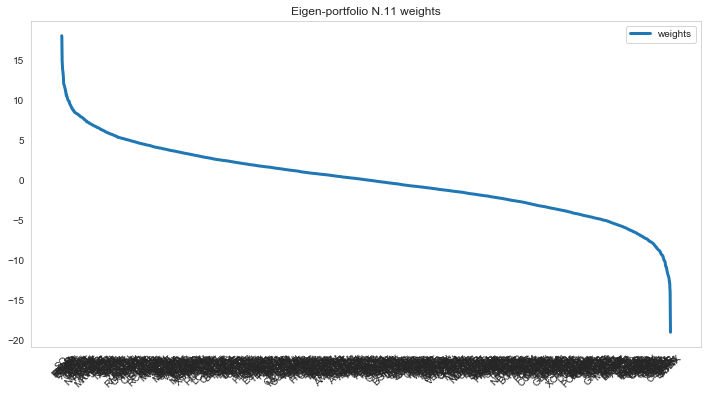

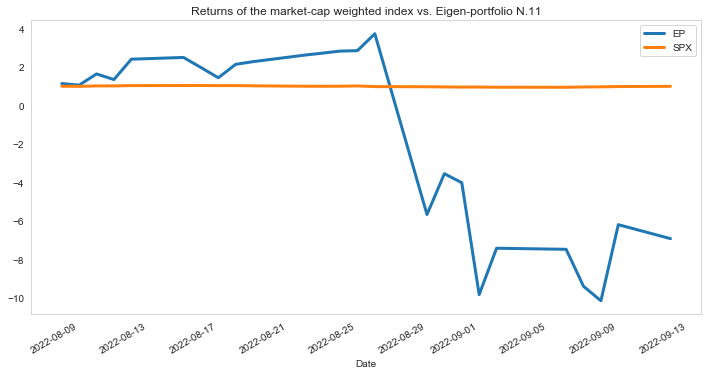

In [7]:
pcl.computeEigenPorts(index_ticker,pca,num_comp,asset_returns,df_raw_test,df_test)


Sum of weights of eigen-portfolio N.1: 100.00


Ticker  Weights                                           Industry                  Sector                                        Description
0    ACGL    10.16                         Property-Casualty Insurers                 Finance               ARCH CAPITAL GROUP LTD. COMMON STOCK
1    SWBI     9.55                           Ordnance And Accessories  Consumer Discretionary            SMITH & WESSON BRANDS INC. COMMON STOCK
2    TIXT     8.97                                                NaN                     NaN  TELUS INTERNATIONAL (CDA) INC. SUBORDINATE VOT...
3    USNA     8.26                                                NaN                     NaN            USANA HEALTH SCIENCES INC. COMMON STOCK
4    TTOO     7.74  Biotechnology: In Vitro & In Vivo Diagnostic S...             Health Care                    T2 BIOSYSTEMS INC. COMMON STOCK
5    BCML     7.65                                        Major Banks                 Finance                           BAYCOM CORP COMMON STOCK
6    UNMA     7.44                         Accident &Health Insurance                 Finance  UNUM GROUP 6.250% JUNIOR SUBORDINATED NOTES DU...
7     TER     7.30                                Electrical Products             Industrials                         TERADYNE INC. COMMON STOCK
8     TOI     7.23                               Medical Specialities             Health Care           THE ONCOLOGY INSTITUTE INC. COMMON STOCK
9    TCMD     6.94                         Medical/Dental Instruments             Health Care       TACTILE SYSTEMS TECHNOLOGY INC. COMMON STOCK
10     SM     6.91                               Oil & Gas Production                  Energy                     SM ENERGY COMPANY COMMON STOCK
11    RDI     6.86                               Movies/Entertainment  Consumer Discretionary     READING INTERNATIONAL INC CLASS A COMMON STOCK
12   QNST     6.85                                        Advertising  Consumer Discretionary                       QUINSTREET INC. COMMON STOCK
13   TREE     6.83                         Finance/Investors Services                 Finance                      LENDINGTREE INC. COMMON STOCK
14    CTG     6.79                                       EDP Services              Technology              COMPUTER TASK GROUP INC. COMMON STOCK
15   SUMO     6.67   Retail: Computer Software & Peripheral Equipment              Technology                       SUMO LOGIC INC. COMMON STOCK
16   TLRY     6.66         Biotechnology: Pharmaceutical Preparations             Health Care            TILRAY BRANDS INC. CLASS 2 COMMON STOCK
17    ARE     6.64                      Real Estate Investment Trusts             Real Estate  ALEXANDRIA REAL ESTATE EQUITIES INC. COMMON STOCK
18     FF     6.64                                    Major Chemicals             Industrials                     FUTUREFUEL CORP. COMMON SHARES
19   CAAS     6.58                                  Auto Parts:O.E.M.  Consumer Discretionary         CHINA AUTOMOTIVE SYSTEMS INC. COMMON STOCK
20   SEVN     6.58                      Real Estate Investment Trusts             Real Estate              SEVEN HILLS REALTY TRUST COMMON STOCK
21  SPTKU     6.40                                                NaN                     NaN                                                NaN
22   RCII     6.37                    Diversified Commercial Services  Consumer Discretionary                    RENT-A-CENTER INC. COMMON STOCK
23    RIO     6.33                                       Metal Mining         Basic Materials                         RIO TINTO PLC COMMON STOCK
24   AXTI     6.32                                     Semiconductors              Technology                               AXT INC COMMON STOCK
25   CASA     6.32  Radio And Television Broadcasting And Communic...              Technology                     CASA SYSTEMS INC. COMMON STOCK
26   CVGW     6.30                                    Specialty Foods  Consumer Discreti

Ticker  Weights                                           Industry                  Sector                                        Description
0   ACGLN    -4.68                         Property-Casualty Insurers                 Finance  ARCH CAPITAL GROUP LTD. DEPOSITARY SHARES EACH...
1    SWIM    -4.68                         Engineering & Construction             Industrials                     LATHAM GROUP INC. COMMON STOCK
2     AUB    -4.72                                        Major Banks                 Finance  ATLANTIC UNION BANKSHARES CORPORATION COMMON S...
3    ROAD    -4.73                         Engineering & Construction             Industrials    CONSTRUCTION PARTNERS INC. CLASS A COMMON STOCK
4     EXR    -4.73                      Real Estate Investment Trusts             Real Estate               EXTRA SPACE STORAGE INC COMMON STOCK
5     BLX    -4.80                                   Commercial Banks                 Finance    BANCO LATINOAMERICANO DE COMERCIO EXTERIOR S.A.
6    AYRO    -4.84                                                NaN                     NaN                             AYRO INC. COMMON STOCK
7    AMTD    -4.84                         Finance: Consumer Services                 Finance  AMTD IDEA GROUP AMERICAN DEPOSITARY SHARES EAC...
8    WYNN    -4.85                                     Hotels/Resorts  Consumer Discretionary                  WYNN RESORTS LIMITED COMMON STOCK
9     VHI    -4.86                             Multi-Sector Companies             Industrials                            VALHI INC. COMMON STOCK
10   SHBI    -4.89                                        Major Banks                 Finance                  SHORE BANCSHARES INC COMMON STOCK
11   IFRX    -4.90         Biotechnology: Pharmaceutical Preparations             Health Care                          INFLARX N.V. COMMON STOCK
12   AVCO    -4.93                                 Building operators             Real Estate                AVALON GLOBOCARE CORP. COMMON STOCK
13   WETF    -4.95                                Investment Managers                 Finance           WISDOMTREE INVESTMENTS INC. COMMON STOCK
14     TX    -5.00                                     Steel/Iron Ore             Industrials  TERNIUM S.A. TERNIUM S.A. AMERICAN DEPOSITARY ...
15  CCNEP    -5.01                                        Major Banks                 Finance  CNB FINANCIAL CORPORATION DEPOSITARY SHARES EA...
16    AXR    -5.03                                       Homebuilding             Real Estate                     AMREP CORPORATION COMMON STOCK
17   BNDW    -5.04                                                NaN                     NaN                                                NaN
18   UNCY    -5.04         Biotechnology: Pharmaceutical Preparations             Health Care           UNICYCIVE THERAPEUTICS INC. COMMON STOCK
19    PFS    -5.05                               Savings Institutions                 Finance      PROVIDENT FINANCIAL SERVICES INC COMMON STOCK
20   VECT    -5.07  Biotechnology: Biological Products (No Diagnos...             Health Care               VECTIVBIO HOLDING AG ORDINARY SHARES
21    AGL    -5.08                                Managed Health Care             Health Care                    AGILON HEALTH INC. COMMON STOCK
22  AMPGW    -5.09                                                NaN                     NaN                                                NaN
23   BASE    -5.09                                       EDP Services              Technology                        COUCHBASE INC. COMMON STOCK
24    DAN    -5.13                                  Auto Parts:O.E.M.  Consumer Discretionary                     DANA INCORPORATED COMMON STOCK
25      B    -5.15                 Office Equipment/Supplies/Services             Industrials                     BARNES GROUP INC. COMMON STOCK
26  BPYPN    -5.15                                        Real Estate                 Fi

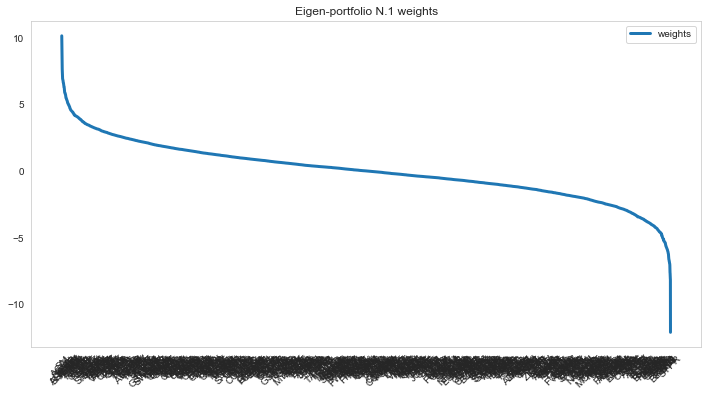

In [14]:
#Create a long-short portfolio using the best component
pcl.createLongShort(pca,asset_returns,1,assets,firstTickers=100,provider=provider)

Eigen portfolio #388 with the highest Sharpe. Return inf%, vol = 966463.00%, Sharpe = inf


Return      Vol     Sharpe
388        inf  9664.63        inf
41   3.05e+279   807.79  3.78e+276
63   4.91e+265  1225.75  4.00e+262
139  2.60e+162   355.75  7.30e+159
286  4.68e+116   127.60  3.67e+114
111   1.25e+80    95.54   1.31e+78
461   6.61e+74    78.64   8.41e+72
471   1.20e+54    97.44   1.23e+52
348   6.09e+51   384.30   1.58e+49
367   1.80e+41   102.46   1.75e+39

weights
CNMD   5153.24
LECO   4234.48
OSH    4137.71
PMVP   4064.98
PFBC   4052.71
CMT    3930.46
GMBL   3841.11
CECE   3826.72
CLW    3799.21
EDIT   3766.29
PRTY   3760.10
DIS    3704.96
CVLT   3685.72
REVB   3685.47
TCBC   3673.23
PDSB   3645.55
DUK    3613.86
CHY    3608.95
EQRXW  3576.02
TDW    3566.67

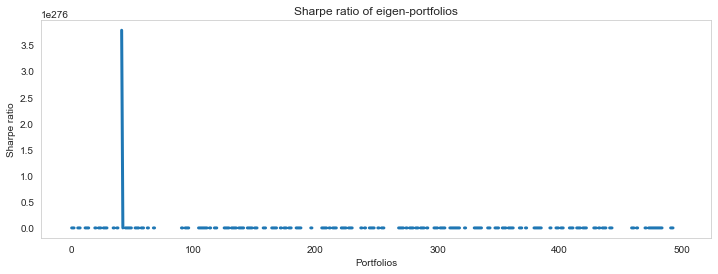

In [15]:
#Simulate 500 portfolios and compute the Sharpe ratio for each one to select the best one
results,sim=pcl.simulatePortfolios(500,pca,asset_returns,df_raw_test,df_test)
